In [51]:

# Importing Libraries
import ast
import seaborn as sns
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Loading Data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [41]:
df_da_sg = df[(df['job_country'] == 'Singapore') & (df['job_title_short'] == 'Data Analyst')].copy()
df_da_sg

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
101,Data Analyst,Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-20 13:15:45,True,False,Singapore,None,NaN,NaN,Moovaz,[sql],{'programming': ['sql']}
244,Data Analyst,Data Analyst,Singapore,via Singapore | JobsDB,Full-time,False,Singapore,2023-10-11 13:17:59,True,False,Singapore,None,NaN,NaN,SATS,"[sql, nosql, azure, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
472,Data Analyst,"Manager, Data Analyst. Data Management Office",Singapore,via LinkedIn,Full-time,False,Singapore,2023-04-10 13:23:10,False,False,Singapore,None,NaN,NaN,UOB,[sql],{'programming': ['sql']}
1269,Data Analyst,Data Analyst (Data Management and Platform Ope...,Singapore,via LinkedIn,Full-time,False,Singapore,2023-03-06 13:57:04,False,False,Singapore,None,NaN,NaN,The Coca-Cola Company,"[sql, shell, python, sql server, azure, oracle...","{'analyst_tools': ['sap', 'tableau', 'microstr..."
1478,Data Analyst,Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-14 13:26:33,True,False,Singapore,None,NaN,NaN,SEACARE MANPOWER SERVICES PTE LTD,"[r, python, tableau, excel]","{'analyst_tools': ['tableau', 'excel'], 'progr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783605,Data Analyst,Ethics & Compliance - Data Analyst,Singapore,via Trabajo.org,Full-time,False,Singapore,2023-01-08 06:17:16,False,False,Singapore,None,NaN,NaN,TikTok,"[sql, excel, power bi, tableau]","{'analyst_tools': ['excel', 'power bi', 'table..."
783745,Data Analyst,Applied Scientist,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-25 06:17:29,False,False,Singapore,None,NaN,NaN,SALESFORCE SINGAPORE PTE. LTD.,"[python, tensorflow, pytorch]","{'libraries': ['tensorflow', 'pytorch'], 'prog..."
784057,Data Analyst,Data and Digital Analyst,Singapore,via Trabajo.org,Full-time,False,Singapore,2023-01-06 06:42:08,True,False,Singapore,None,NaN,NaN,JLL,[spark],{'libraries': ['spark']}
785335,Data Analyst,"Finance Data Analytics, Associate",Singapore,via Trabajo.org,Full-time,False,Singapore,2023-11-02 06:17:35,False,False,Singapore,None,NaN,NaN,"JPMORGAN CHASE BANK, N.A.",[sql],{'programming': ['sql']}


In [42]:
df_da_sg['job_posted_month_no'] = df_da_sg['job_posted_date'].dt.month

In [43]:
df_da_sg_explode = df_da_sg.explode('job_skills')

In [44]:
df_da_sg_pivot = df_da_sg_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_da_sg_pivot.loc['Total'] = df_da_sg_pivot.sum()

df_da_sg_pivot = df_da_sg_pivot[df_da_sg_pivot.loc['Total'].sort_values(ascending=False).index]

df_da_sg_pivot = df_da_sg_pivot.drop('Total')

df_da_sg_pivot

job_skills,sql,python,excel,tableau,r,power bi,sas,aws,powerpoint,word,...,tidyverse,ionic,symphony,firestore,svn,macos,ggplot2,kotlin,groovy,puppet
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,379,334,197,230,137,99,96,53,31,40,...,0,0,0,0,0,0,0,0,1,0
2,235,188,145,121,76,86,40,22,34,23,...,0,0,0,0,1,0,0,0,0,0
3,306,241,205,215,110,112,66,29,46,38,...,0,0,0,0,0,0,0,0,0,0
4,283,212,193,179,87,80,78,43,28,28,...,0,0,0,0,0,0,0,0,0,0
5,260,237,172,145,102,84,58,42,36,35,...,0,0,0,0,0,0,0,0,0,0
6,308,244,244,171,102,102,48,50,38,49,...,0,0,0,0,0,0,0,0,0,0
7,409,330,223,250,132,133,48,61,30,41,...,0,0,0,0,0,0,0,0,0,0
8,339,281,245,218,119,129,54,42,55,53,...,0,0,0,0,0,0,0,0,0,0
9,180,166,113,127,69,88,34,24,24,31,...,0,0,0,0,0,0,1,0,0,0


In [45]:
da_total = df_da_sg.groupby('job_posted_month_no').size()
da_total

job_posted_month_no
1     639
2     392
3     538
4     521
5     462
6     560
7     662
8     625
9     348
10    353
11    564
12    968
dtype: int64

In [46]:
df_da_sg_perc = df_da_sg_pivot.div(da_total/100, axis= 0)
df_da_sg_perc

job_skills,sql,python,excel,tableau,r,power bi,sas,aws,powerpoint,word,...,tidyverse,ionic,symphony,firestore,svn,macos,ggplot2,kotlin,groovy,puppet
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,59.311424,52.269171,30.829421,35.993740,21.439750,15.492958,15.023474,8.294210,4.851330,6.259781,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156495,0.000000
2,59.948980,47.959184,36.989796,30.867347,19.387755,21.938776,10.204082,5.612245,8.673469,5.867347,...,0.000000,0.000000,0.000000,0.000000,0.255102,0.000000,0.000000,0.000000,0.000000,0.000000
3,56.877323,44.795539,38.104089,39.962825,20.446097,20.817844,12.267658,5.390335,8.550186,7.063197,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,54.318618,40.690979,37.044146,34.357006,16.698656,15.355086,14.971209,8.253359,5.374280,5.374280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,56.277056,51.298701,37.229437,31.385281,22.077922,18.181818,12.554113,9.090909,7.792208,7.575758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,55.000000,43.571429,43.571429,30.535714,18.214286,18.214286,8.571429,8.928571,6.785714,8.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,61.782477,49.848943,33.685801,37.764350,19.939577,20.090634,7.250755,9.214502,4.531722,6.193353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,54.240000,44.960000,39.200000,34.880000,19.040000,20.640000,8.640000,6.720000,8.800000,8.480000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,51.724138,47.701149,32.471264,36.494253,19.827586,25.287356,9.770115,6.896552,6.896552,8.908046,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287356,0.000000,0.000000,0.000000


In [47]:
df_da_sg_perc = df_da_sg_perc.reset_index()

df_da_sg_perc['job_posted_month'] = df_da_sg_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

df_da_sg_perc = df_da_sg_perc.set_index('job_posted_month')

df_da_sg_perc = df_da_sg_perc.drop(columns= 'job_posted_month_no')

df_da_sg_perc

job_skills,sql,python,excel,tableau,r,power bi,sas,aws,powerpoint,word,...,tidyverse,ionic,symphony,firestore,svn,macos,ggplot2,kotlin,groovy,puppet
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,59.311424,52.269171,30.829421,35.993740,21.439750,15.492958,15.023474,8.294210,4.851330,6.259781,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156495,0.000000
Feb,59.948980,47.959184,36.989796,30.867347,19.387755,21.938776,10.204082,5.612245,8.673469,5.867347,...,0.000000,0.000000,0.000000,0.000000,0.255102,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,56.877323,44.795539,38.104089,39.962825,20.446097,20.817844,12.267658,5.390335,8.550186,7.063197,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,54.318618,40.690979,37.044146,34.357006,16.698656,15.355086,14.971209,8.253359,5.374280,5.374280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,56.277056,51.298701,37.229437,31.385281,22.077922,18.181818,12.554113,9.090909,7.792208,7.575758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,55.000000,43.571429,43.571429,30.535714,18.214286,18.214286,8.571429,8.928571,6.785714,8.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,61.782477,49.848943,33.685801,37.764350,19.939577,20.090634,7.250755,9.214502,4.531722,6.193353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,54.240000,44.960000,39.200000,34.880000,19.040000,20.640000,8.640000,6.720000,8.800000,8.480000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,51.724138,47.701149,32.471264,36.494253,19.827586,25.287356,9.770115,6.896552,6.896552,8.908046,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287356,0.000000,0.000000,0.000000


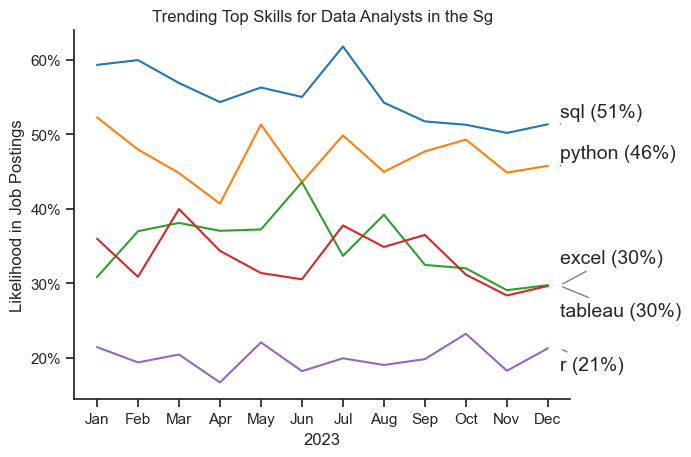

In [90]:
df_plot = df_da_sg_perc.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the Sg')
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Offsets for text position adjustments
offsets = [1, 1, 3, -4, -3]

# Annotate each skill with arrows and percentages
for i in range(5):
    # Get the last value for each skill
    value = df_plot.iloc[-1, i]
    label = f"{df_plot.columns[i]} ({value:.0f}%)"  # Add percentage to label
    
    # Annotate with text and arrow
    plt.annotate(
        label,  # Text with percentage
        xy=(11.3, value),  # Original data point (end of line)
        xytext=(11.3, value + offsets[i]),  # Adjusted position
        arrowprops=dict(
            arrowstyle="-",  # Arrow style
            color="gray",    # Arrow color
            lw=1             # Line width
        ),
        fontsize=14  # Adjust text size as needed
    )
